In [1]:
from __future__ import print_function
import numpy as np
from script import two_lpt

In [2]:
music_exec = "../music/MUSIC"  ## full path to the MUSIC executable
## Let us choose a small box to start with
box = 128.0 ### Mpc/h

## Create an array of redshift values where snapshots will be created.
alist = np.linspace(0.0625, 0.1667, num=51) ## equally spaced list of scale factor values between z = 15 and 5
zlist = 1 / alist - 1

## directory where 2LPT outputs will be stored
two_lpt_outpath = '/home/tirth/LARGE_DATA_FILES/GADGET-3-DATA/N128_L128.0_MUSIC_2LPT-r1'
outroot = 'snap' ## root of the output snapshots
dx = 1. ## the grid resolution in Mpc/h, is also the mean inter-particle distance

## cosmological parameters
omega_m = 0.308
omega_l = 1 - omega_m
omega_b = 0.0482
h = 0.678
sigma_8 = 0.829
ns = 0.961

## seed of the random number generator
seed = 181170

In [3]:
two_lpt.run_music(music_exec,
                  box,
                  zlist,
                  seed,
                  two_lpt_outpath,
                  outroot,
                  dx,
                  omega_m,
                  omega_l,
                  omega_b,
                  h,
                  sigma_8,
                  ns,
)

number of particles =  128 ^ 3
running MUSIC for z =  15.0 , output snapshot:  /home/tirth/LARGE_DATA_FILES/GADGET-3-DATA/N128_L128.0_MUSIC_2LPT-r1/snap_000
running MUSIC for z =  14.483711135885049 , output snapshot:  /home/tirth/LARGE_DATA_FILES/GADGET-3-DATA/N128_L128.0_MUSIC_2LPT-r1/snap_001
running MUSIC for z =  13.999700005999879 , output snapshot:  /home/tirth/LARGE_DATA_FILES/GADGET-3-DATA/N128_L128.0_MUSIC_2LPT-r1/snap_002
running MUSIC for z =  13.545031417267863 , output snapshot:  /home/tirth/LARGE_DATA_FILES/GADGET-3-DATA/N128_L128.0_MUSIC_2LPT-r1/snap_003
running MUSIC for z =  13.11711559094246 , output snapshot:  /home/tirth/LARGE_DATA_FILES/GADGET-3-DATA/N128_L128.0_MUSIC_2LPT-r1/snap_004
running MUSIC for z =  12.713658804168952 , output snapshot:  /home/tirth/LARGE_DATA_FILES/GADGET-3-DATA/N128_L128.0_MUSIC_2LPT-r1/snap_005
running MUSIC for z =  12.332622260146126 , output snapshot:  /home/tirth/LARGE_DATA_FILES/GADGET-3-DATA/N128_L128.0_MUSIC_2LPT-r1/snap_006
runn

In [4]:
import script

In [5]:
## Let us choose one of the snapshots created by the 2LPT run
gadget_snap = '/home/tirth/LARGE_DATA_FILES/GADGET-3-DATA/N128_L128.0_MUSIC_2LPT-r1/snap_030'
## output directory to store the script output files
script_outpath = two_lpt_outpath + '/script_files'

## read the MUSIC config file
import configparser
config = configparser.ConfigParser()
config.read('/home/tirth/LARGE_DATA_FILES/GADGET-3-DATA/N128_L128.0_MUSIC_2LPT-r1/music_030.info')
omega_b = config['cosmology']['Omega_b']
sigma_8 = config['cosmology']['sigma_8']
ns = config['cosmology']['nspec']

two_lpt_data = script.default_simulation_data(gadget_snap, script_outpath, sigma_8=sigma_8, ns=ns, omega_b=omega_b)

In [6]:
ngrid = 64 ## number of grid cells in each direction used for generating the maps
dens_fields = script.matter_fields(two_lpt_data, ngrid, script_outpath, overwrite_files=False)
ion_map = script.ionization_map(dens_fields)

Done reading density + velocity file:  /home/tirth/LARGE_DATA_FILES/GADGET-3-DATA/N128_L128.0_MUSIC_2LPT-r1/script_files/density_velocity_ngrid0064_z007.00
Done reading fcoll file for all Mmin:  /home/tirth/LARGE_DATA_FILES/GADGET-3-DATA/N128_L128.0_MUSIC_2LPT-r1/script_files/fcollfield_nofluc_ngrid0064_z007.00


In [7]:
## parameters for generating the ionization maps
log10Mmin = 8.0
zeta = 8.0

fcoll_arr = dens_fields.get_fcoll_for_Mmin(log10Mmin)
qi_arr = ion_map.get_qi(zeta * fcoll_arr)

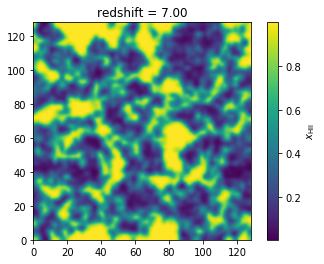

In [8]:
import pylab as plt
centre = 0.5 ## the position of the slice in units of box size
ygrid = int(ngrid * centre)
im = plt.imshow(qi_arr[:,ygrid,:].T, origin='low', extent=[0, box, 0, box], interpolation='bicubic')
cbar = plt.colorbar(im)
cbar.set_label(r'$x_{\mathrm{HII}}$')
plt.title(r'redshift = ' + '{:.2f}'.format(two_lpt_data.z))
plt.show()

In [9]:
## Let us make another map for a different redshift.
gadget_snap_2 = '/home/tirth/LARGE_DATA_FILES/GADGET-3-DATA/N128_L128.0_MUSIC_2LPT-r1/snap_018'
two_lpt_data_2 = script.default_simulation_data(gadget_snap_2, script_outpath, sigma_8=sigma_8, ns=ns, omega_b=omega_b)

dens_fields_2 = script.matter_fields(two_lpt_data_2, ngrid, script_outpath, overwrite_files=False)
ion_map_2 = script.ionization_map(dens_fields_2)

Done reading density + velocity file:  /home/tirth/LARGE_DATA_FILES/GADGET-3-DATA/N128_L128.0_MUSIC_2LPT-r1/script_files/density_velocity_ngrid0064_z009.00
Done reading fcoll file for all Mmin:  /home/tirth/LARGE_DATA_FILES/GADGET-3-DATA/N128_L128.0_MUSIC_2LPT-r1/script_files/fcollfield_nofluc_ngrid0064_z009.00


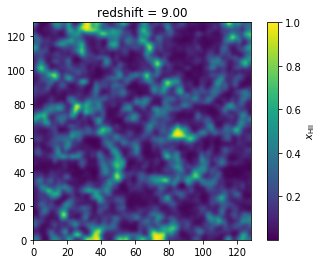

In [10]:
fcoll_arr_2 = dens_fields_2.get_fcoll_for_Mmin(log10Mmin)
qi_arr_2 = ion_map_2.get_qi(zeta * fcoll_arr_2)

im_2 = plt.imshow(qi_arr_2[:,ygrid,:].T, origin='low', extent=[0, box, 0, box], interpolation='bicubic')
cbar_2 = plt.colorbar(im_2)
cbar_2.set_label(r'$x_{\mathrm{HII}}$')
plt.title(r'redshift = ' + '{:.2f}'.format(two_lpt_data_2.z))
plt.show()